In [20]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST      # 色彩通道为1

In [21]:
'''
transform2 = transforms.Compose( {
    transforms.ToTensor(),
    transforms.Normalize( ( 0.1307 ), ( 0.3081 ) )
} )
'''
train_data = MNIST( './data', train = True, download = True, transform = transforms.ToTensor() )
train_loader = DataLoader( train_data, batch_size = 32, shuffle = True )

test_data = MNIST( './data', train = False, download = False, transform = transforms.ToTensor() )
test_loader = DataLoader( test_data, batch_size = 32, shuffle = False )

test_data, train_data

(Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor())

In [22]:
class handwriting_Model( nn.Module ):
    def __init__( self ):
        super( handwriting_Model, self ).__init__()
        self.layer1 = nn.Linear( 784, 256 )
        self.layer2 = nn.Linear( 256, 64 )
        self.layer3 = nn.Linear( 64, 10 )
        
    
    def forward( self, x ):
        x = x.view( -1, 784 )
        x = torch.relu( self.layer1( x ) )
        x = torch.relu( self.layer2( x ) )
        return self.layer3( x )

In [23]:
net = handwriting_Model()
loss_f = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( net.parameters(), lr = 0.1 )

for epoch in range( 5 ):
    running_loss = 0.0
    for steps, data in enumerate( train_loader, 0 ):
        inputs, label = data
        optimizer.zero_grad()
        outputs = net( inputs )
        loss = loss_f( outputs, label )
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if steps % 1000 == 999:
            for data_test in test_loader:
                with torch.no_grad():
                    img, labels = data_test
                    outputs = net( img )
                    pred = torch.max( outputs.data, dim = 1 )[1]
                    accuracy = torch.eq( pred, labels ).sum().item() / labels.size( 0 )
                    print( '[%d %5d]  loss: %.3f  accuracy:%.3f' % ( epoch + 1, steps + 1, running_loss / 500, accuracy ) )
                    running_loss = 0.0

[1  1000]  loss: 1.007  accuracy:0.969
[1  1000]  loss: 0.000  accuracy:0.938
[1  1000]  loss: 0.000  accuracy:0.906
[1  1000]  loss: 0.000  accuracy:0.969
[1  1000]  loss: 0.000  accuracy:0.969
[1  1000]  loss: 0.000  accuracy:0.969
[1  1000]  loss: 0.000  accuracy:0.938
[1  1000]  loss: 0.000  accuracy:0.875
[1  1000]  loss: 0.000  accuracy:0.938
[1  1000]  loss: 0.000  accuracy:0.906
[1  1000]  loss: 0.000  accuracy:0.875
[1  1000]  loss: 0.000  accuracy:0.875
[1  1000]  loss: 0.000  accuracy:0.938
[1  1000]  loss: 0.000  accuracy:0.938
[1  1000]  loss: 0.000  accuracy:0.844
[1  1000]  loss: 0.000  accuracy:0.938
[1  1000]  loss: 0.000  accuracy:0.938
[1  1000]  loss: 0.000  accuracy:0.938
[1  1000]  loss: 0.000  accuracy:0.906
[1  1000]  loss: 0.000  accuracy:0.875
[1  1000]  loss: 0.000  accuracy:0.969
[1  1000]  loss: 0.000  accuracy:0.906
[1  1000]  loss: 0.000  accuracy:0.875
[1  1000]  loss: 0.000  accuracy:0.969
[1  1000]  loss: 0.000  accuracy:0.906
[1  1000]  loss: 0.000  a

In [24]:
torch.save( net.state_dict(), './path/LeNet2.pth' )
print( 'finished' )

finished


识别数字：0


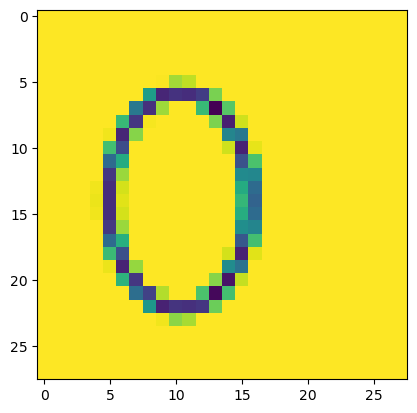

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open( './data/test5.jpg' )
img = img.resize( ( 28, 28 ) )
img = img.convert( 'L' )                        # 灰度
img = transforms.ToTensor()( img )
img = img.view( 1, 28, 28 )

output = net( img )
pred = torch.max( output.data, dim = 1 )[1]
print( '识别数字：%d' % pred.item() )
plt.imshow( img.squeeze() )
plt.show()